In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import sys
import math

from datetime import datetime
from datetime import timedelta
import datetime

from math import sqrt
from scipy import spatial
from numpy import array
from numpy import corrcoef
from scipy.spatial import distance
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

from sklearn.decomposition import PCA

from numpy import array

In [2]:
def dist_euclidian(v1,v2):
    return distance.euclidean(v1, v2)

def measure_cossine(v1,v2):
    return (1 - spatial.distance.cosine(v1, v2))

def measure_correlation(v1,v2):
    return corrcoef(v1,v2)[0,1]

def dist_correlation(dc):
    return math.sqrt(2 *(1 - dc))

def measure_angle(arcc):
    return math.degrees(np.arccos(arcc))

def measure(v1,v2):
    #return measure_correlation(v1,v2)
    return measure_correlation(v1,v2)

In [3]:
df = pd.DataFrame()
path = ""
filename = "iris.data"
file = path + str(filename)

In [4]:
df = pd.read_csv(file, delimiter=",")

In [5]:
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
columns = ['Species']
df.drop(columns, inplace=True, axis=1)
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
df = df.apply(pd.to_numeric, errors='coerce')

In [8]:
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
df.dtypes

SepalLength    float64
SepalWidth     float64
PetalLength    float64
PetalWidth     float64
dtype: object

In [10]:
len(df.columns)

4

In [11]:
df.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


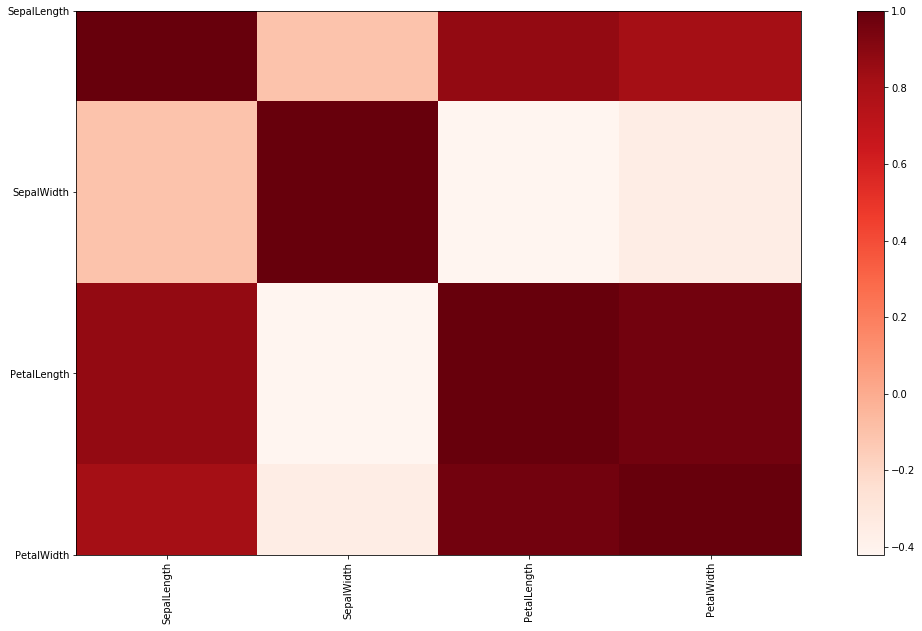

In [12]:
plt.figure(figsize=(20,10))
plt.imshow(df.corr(), cmap=plt.cm.Reds, interpolation='nearest')
plt.colorbar()
tick_marks = [i for i in range(len(df.columns))]
plt.xticks(tick_marks, df.columns, rotation='vertical')
plt.yticks(tick_marks, df.columns)
plt.show()

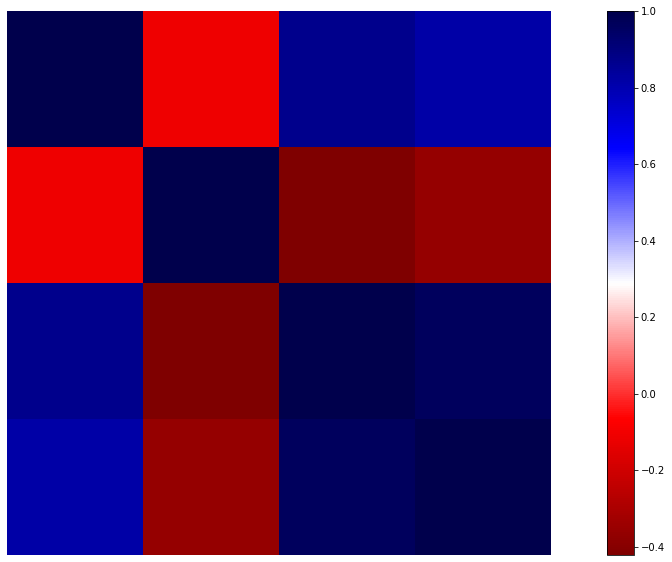

In [13]:
mc = df.corr()

plt.figure(figsize=(20,10))
plt.imshow(mc, cmap='seismic_r',  interpolation ='None', 
           vmin = mc.min().min(), vmax=mc.max().max())
plt.colorbar()
plt.axis('off')
path = ""
filename = "iris_red.png"
plt.savefig(path + filename)
plt.show()

In [14]:
m = df.corr()
mc = m.values
size = len(df.T)

matriz = np.zeros((size,size),float)
for i in range (0,size):
    for j in range (0,size):
        matriz[i][j] = np.sqrt(2*(1-mc[i][j]))

mst = np.zeros((size,size),float)

In [15]:
prox_vertice = 0
atual_vertice = 0
menor = 0
for i in range (0,size):
    for j in range(0,size):
        if (i !=j):
            if (menor == 0):
                menor =  matriz[i][j]
                prox_vertice = i
                atual_vertice = i
            else:
                if ( matriz[i][j] < menor):
                    menor =  matriz[i][j]
                    prox_vertice = i
                    atual_vertice = i

In [16]:
visitados = []
bordas = []
peso = 0
menor = 0

for i in range (0,size-1):
    visitados.append(prox_vertice)
    for j in range (0,len(visitados)):
        for k in range (0,size):
            if (k not in visitados):
                if (matriz[visitados[j]][k] != 0):
                    if (menor == 0):
                        menor = matriz[visitados[j]][k]
                        prox_vertice = k
                        atual_vertice = visitados[j]

                    else:
                        if (matriz[visitados[j]][k]<menor):
                            menor = matriz[visitados[j]][k]
                            prox_vertice = k
                            atual_vertice = visitados[j]
        
        
    mst[atual_vertice][prox_vertice] = menor
    mst[prox_vertice][atual_vertice] = menor
    borda = [atual_vertice , prox_vertice , menor]
    bordas.append(borda)
    peso = peso + menor
    menor = 0
    
visitados.append(prox_vertice)

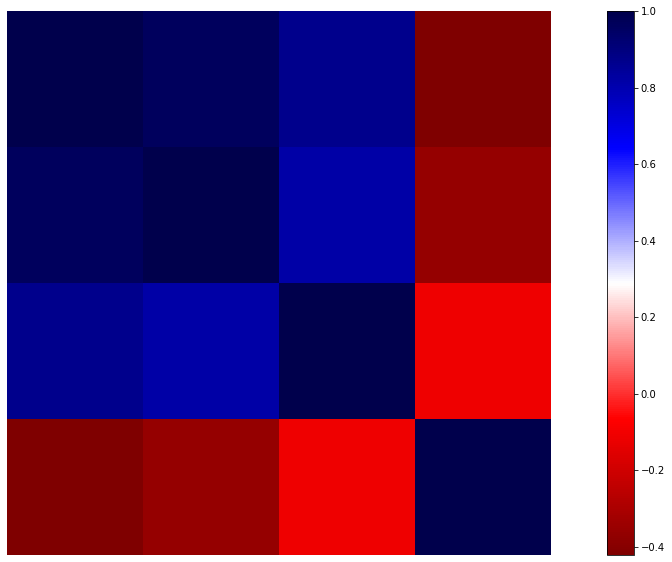

In [17]:
plt.close()
cor = np.zeros((size,size),float)

for j in range (0,size):
    for i in range (0,size):
        cor[i][j] = mc[visitados[i]][visitados[j]]     

plt.figure(figsize=(20,10))
plt.imshow(cor, cmap='seismic_r',  interpolation ='None', 
           vmin = mc.min().min(), vmax=mc.max().max())
plt.colorbar()
plt.axis('off')
path = ''#(os.path.abspath(".")) + "/../../images/wine/"
file = path + "iris_cluster.png"
plt.savefig(file)
plt.show()

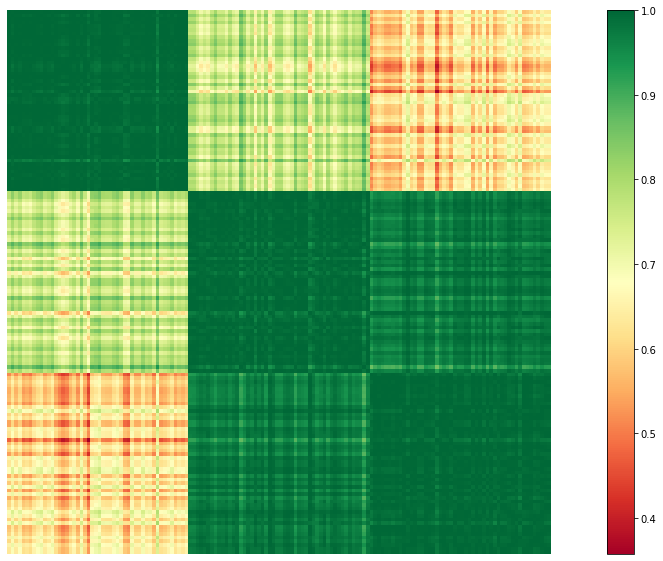

In [18]:
plt.figure(figsize=(20,10))
plt.imshow(df.T.corr(), cmap=plt.cm.RdYlGn, interpolation ='None', 
           vmin = df.T.corr().min().min(), vmax=df.T.corr().max().max())
plt.colorbar()
plt.axis('off')
path = '' #(os.path.abspath(".")) + "/../../images/wine/"
filename = "iris.png"
plt.savefig(path + filename)
plt.show()

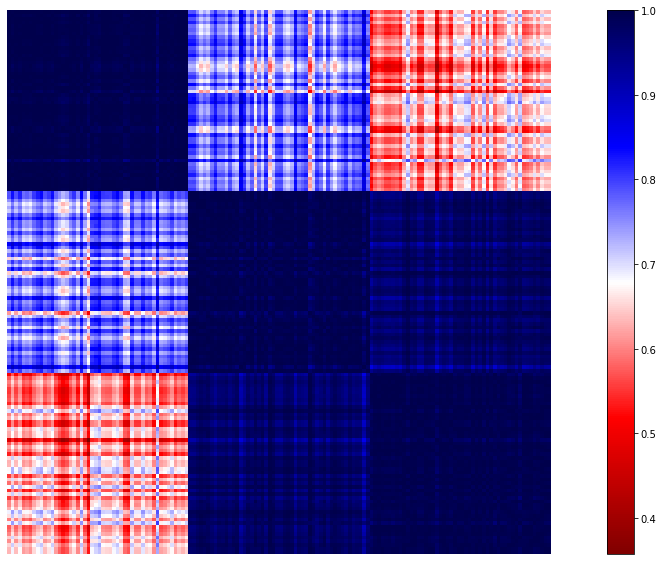

In [19]:
mc = df.T.corr()

plt.figure(figsize=(20,10))
plt.imshow(mc, cmap='seismic_r',  interpolation ='None', 
           vmin = mc.min().min(), vmax=mc.max().max())
plt.colorbar()
plt.axis('off')
path = ''#(os.path.abspath(".")) + "/../../images/wine/"
filename = "iris_red.svg"
plt.savefig(path + filename)
plt.show()

In [20]:
X = df.values
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principalcomponent1', 'principalcomponent2'])
print(principalDf.head())
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1])

   principalcomponent1  principalcomponent2
0            -2.684207             0.326607
1            -2.715391            -0.169557
2            -2.889820            -0.137346
3            -2.746437            -0.311124
4            -2.728593             0.333925
[0.92461621 0.05301557]
0.9776317750248035


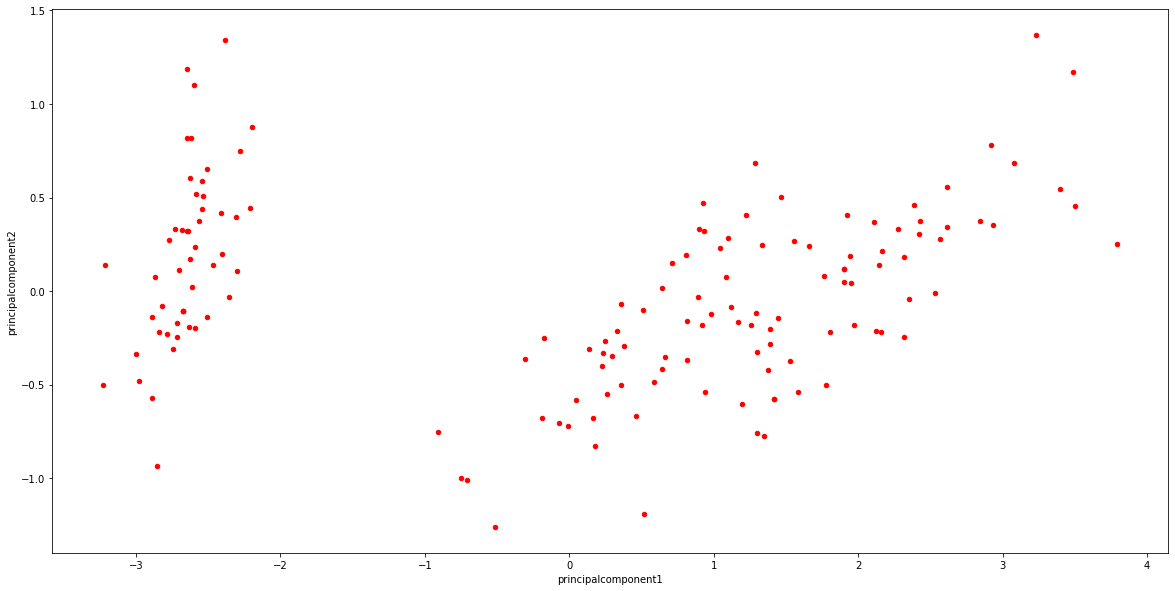

In [21]:
principalDf.plot(kind='scatter',x='principalcomponent1',y='principalcomponent2',color='red', figsize=(20,10))
plt.show()

In [22]:
m = df.T.corr()
mc = m.values
size = len(df)

matriz = np.zeros((size,size),float)
for i in range (0,size):
    for j in range (0,size):
        matriz[i][j] = np.sqrt(2*(1-mc[i][j]))

mst = np.zeros((size,size),float)

In [23]:
prox_vertice = 0
atual_vertice = 0
menor = 0
for i in range (0,size):
    for j in range(0,size):
        if (i !=j):
            if (menor == 0):
                menor =  matriz[i][j]
                prox_vertice = i
                atual_vertice = i
            else:
                if ( matriz[i][j] < menor):
                    menor =  matriz[i][j]
                    prox_vertice = i
                    atual_vertice = i

In [24]:
visitados = []
bordas = []
peso = 0
menor = 0

for i in range (0,size-1):
    visitados.append(prox_vertice)
    for j in range (0,len(visitados)):
        for k in range (0,size):
            if (k not in visitados):
                if (matriz[visitados[j]][k] != 0):
                    if (menor == 0):
                        menor = matriz[visitados[j]][k]
                        prox_vertice = k
                        atual_vertice = visitados[j]

                    else:
                        if (matriz[visitados[j]][k]<menor):
                            menor = matriz[visitados[j]][k]
                            prox_vertice = k
                            atual_vertice = visitados[j]
        
        
    mst[atual_vertice][prox_vertice] = menor
    mst[prox_vertice][atual_vertice] = menor
    borda = [atual_vertice , prox_vertice , menor]
    bordas.append(borda)
    peso = peso + menor
    menor = 0
    
visitados.append(prox_vertice)

In [25]:
bordas[0:100]

[[142, 107, 0.00493959310734903],
 [107, 101, 0.00493959310734903],
 [107, 143, 0.017188389053842713],
 [143, 121, 0.02098015562792382],
 [107, 104, 0.02367996431727459],
 [104, 105, 0.024649820182601482],
 [105, 128, 0.003842125283966262],
 [128, 132, 0.017868700634999034],
 [132, 108, 0.00621547194887952],
 [132, 113, 0.007202021616796758],
 [108, 122, 0.00812479835367298],
 [113, 114, 0.019979510085300762],
 [121, 83, 0.03084180929710694],
 [83, 116, 0.010619361288960967],
 [116, 124, 0.007992110310693036],
 [124, 125, 0.004739234796840643],
 [124, 148, 0.02225122024778802],
 [148, 137, 0.00930373458463044],
 [137, 149, 0.01018021786264923],
 [149, 117, 0.013661688163861424],
 [83, 136, 0.023853253856144813],
 [125, 109, 0.025505667716889006],
 [109, 129, 0.025204078163487662],
 [129, 133, 0.02142076508955977],
 [136, 103, 0.02755704542171405],
 [103, 106, 0.027726508456950315],
 [106, 134, 0.016677695272180458],
 [129, 115, 0.0321877289366926],
 [115, 147, 0.02195906018361915],
 [1

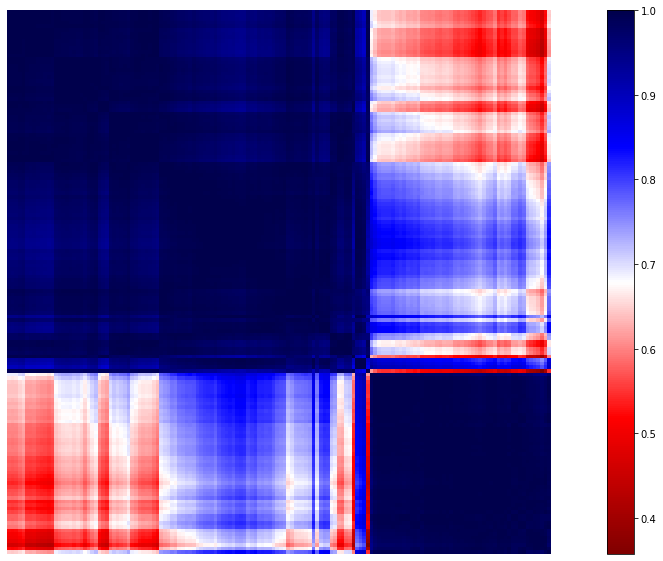

In [26]:
plt.close()
cor = np.zeros((size,size),float)

for j in range (0,size):
    for i in range (0,size):
        cor[i][j] = mc[visitados[i]][visitados[j]]     

plt.figure(figsize=(20,10))
plt.imshow(cor, cmap='seismic_r',  interpolation ='None', 
           vmin = mc.min().min(), vmax=mc.max().max())
plt.colorbar()
plt.axis('off')
path = '' #(os.path.abspath(".")) + "/../../images/wine/"
file = path + "iris_cluster.png"
plt.savefig(file)
plt.show()

In [27]:
print(cor[0][0], cor[0][1], cor[0][2])

1.0 0.9999878002099669 1.0


In [28]:
for j in range (0,size):
    value = cor[0][j]
    if (value > 0):
        print(value,j )

1.0 0
0.9999878002099669 1
1.0 2
0.9998176935413307 3
0.9997209032498765 4
0.9996726335065755 5
0.9992675222862492 6
0.9992471503682455 7
0.9983960587983722 8
0.9983831493833132 9
0.9979860817783743 10
0.9981847336286052 11
0.9968240005178194 12
0.9985514193194507 13
0.9979676785184102 14
0.9974285003937451 15
0.9972851558778253 16
0.9964368462962657 17
0.9967398408482386 18
0.9958898674050369 19
0.9964121089650252 20
0.9987683777867656 21
0.997909601420273 22
0.9960111147189188 23
0.994511009432519 24
0.9991996168621604 25
0.998213891554424 26
0.9971947027378332 27
0.9958741757812355 28
0.9936422362834822 29
0.9938180345369495 30
0.9916298823596693 31
0.9911837963102648 32
0.9894795771836381 33
0.9956849375676059 34
0.9969887038718056 35
0.9984745135406864 36
0.9983022949582455 37
0.9980349998530944 38
0.997078904059463 39
0.9981668147068158 40
0.9984511797399227 41
0.9907035834158581 42
0.9891316841734958 43
0.9874704942288991 44
0.9831063393355784 45
0.9817729397788721 46
0.97672142

In [29]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [30]:
df.T.corr

<bound method DataFrame.corr of              0    1    2    3    4    5    6    7    8    9    ...  140  141  \
SepalLength  5.1  4.9  4.7  4.6  5.0  5.4  4.6  5.0  4.4  4.9  ...  6.7  6.9   
SepalWidth   3.5  3.0  3.2  3.1  3.6  3.9  3.4  3.4  2.9  3.1  ...  3.1  3.1   
PetalLength  1.4  1.4  1.3  1.5  1.4  1.7  1.4  1.5  1.4  1.5  ...  5.6  5.1   
PetalWidth   0.2  0.2  0.2  0.2  0.2  0.4  0.3  0.2  0.2  0.1  ...  2.4  2.3   

             142  143  144  145  146  147  148  149  
SepalLength  5.8  6.8  6.7  6.7  6.3  6.5  6.2  5.9  
SepalWidth   2.7  3.2  3.3  3.0  2.5  3.0  3.4  3.0  
PetalLength  5.1  5.9  5.7  5.2  5.0  5.2  5.4  5.1  
PetalWidth   1.9  2.3  2.5  2.3  1.9  2.0  2.3  1.8  

[4 rows x 150 columns]>

In [31]:
df.T.corr()

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,1.000000,0.995999,0.999974,0.998168,0.999347,0.999586,0.998811,0.999538,0.998077,0.996552,...,0.597825,0.685581,0.574649,0.584668,0.603048,0.646865,0.605998,0.653473,0.633917,0.633158
1,0.995999,1.000000,0.996607,0.997397,0.992233,0.993592,0.990721,0.997118,0.998546,0.999033,...,0.657750,0.742643,0.632574,0.642756,0.661387,0.705879,0.667114,0.708983,0.686257,0.684835
2,0.999974,0.996607,1.000000,0.998333,0.999061,0.999377,0.998438,0.999605,0.998356,0.996986,...,0.602231,0.689931,0.578798,0.588854,0.607300,0.651305,0.610553,0.657556,0.637631,0.636806
3,0.998168,0.997397,0.998333,1.000000,0.996719,0.997833,0.996139,0.999546,0.999833,0.999307,...,0.641080,0.722377,0.620453,0.629754,0.646729,0.686380,0.647851,0.694538,0.677737,0.677225
4,0.999347,0.992233,0.999061,0.996719,1.000000,0.999883,0.999914,0.998503,0.996031,0.993761,...,0.576858,0.664510,0.555166,0.564947,0.582896,0.625491,0.584183,0.634029,0.616536,0.616138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.646865,0.705879,0.651305,0.686380,0.625491,0.637136,0.619952,0.666813,0.692027,0.707759,...,0.996370,0.998265,0.987727,0.990527,0.994838,1.000000,0.998465,0.997358,0.986717,0.984538
146,0.605998,0.667114,0.610553,0.647851,0.584183,0.596356,0.578648,0.627102,0.653442,0.669840,...,0.999123,0.993504,0.993021,0.994971,0.997667,0.998465,1.000000,0.996569,0.988469,0.986481
147,0.653473,0.708983,0.657556,0.694538,0.634029,0.645719,0.629353,0.674239,0.698921,0.714003,...,0.997317,0.994245,0.993642,0.995438,0.997842,0.997358,0.996569,1.000000,0.995708,0.994460
148,0.633917,0.686257,0.637631,0.677737,0.616536,0.628487,0.612866,0.656100,0.680633,0.695249,...,0.993087,0.980296,0.996437,0.996619,0.995967,0.986717,0.988469,0.995708,1.000000,0.999916


In [32]:
df_corr = df.T.corr().head()

In [33]:
bordas[0]

[142, 107, 0.00493959310734903]

In [34]:
data= np.array(bordas)

In [35]:
data[:,2]

array([0.00493959, 0.00493959, 0.01718839, 0.02098016, 0.02367996,
       0.02464982, 0.00384213, 0.0178687 , 0.00621547, 0.00720202,
       0.0081248 , 0.01997951, 0.03084181, 0.01061936, 0.00799211,
       0.00473923, 0.02225122, 0.00930373, 0.01018022, 0.01366169,
       0.02385325, 0.02550567, 0.02520408, 0.02142077, 0.02755705,
       0.02772651, 0.0166777 , 0.03218773, 0.02195906, 0.01364773,
       0.01991554, 0.00888186, 0.02165712, 0.02517245, 0.01544828,
       0.02410631, 0.00984891, 0.00443462, 0.0162359 , 0.01656117,
       0.01666865, 0.03352003, 0.01117266, 0.02943788, 0.03023805,
       0.02572409, 0.02617566, 0.00989656, 0.01098815, 0.02638117,
       0.02850691, 0.02135339, 0.01140421, 0.01049951, 0.0076247 ,
       0.0074678 , 0.01066497, 0.01426839, 0.01477255, 0.00850768,
       0.0066858 , 0.01284222, 0.01363361, 0.01011944, 0.0091015 ,
       0.01893647, 0.01604328, 0.00758408, 0.02617125, 0.01580024,
       0.01550688, 0.00243378, 0.02181699, 0.02640836, 0.01610

In [36]:
dataset = pd.DataFrame({'v1':data[:,0],'v2':data[:,1], 'w':5*(1/data[:,2])})
print(dataset.head())

      v1     v2            w
0  142.0  107.0  1012.229123
1  107.0  101.0  1012.229123
2  107.0  143.0   290.894044
3  143.0  121.0   238.320444
4  107.0  104.0   211.148967


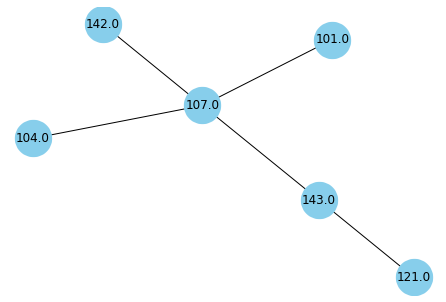

In [37]:
G = nx.from_pandas_edgelist(dataset.head(5), 'v1', 'v2', edge_attr='w')
#nx.draw(G, node_color="skyblue", linewidths=20, with_labels=True, node_size=100, width=2)
nx.draw(G, node_color="skyblue", linewidths=20, with_labels=True)

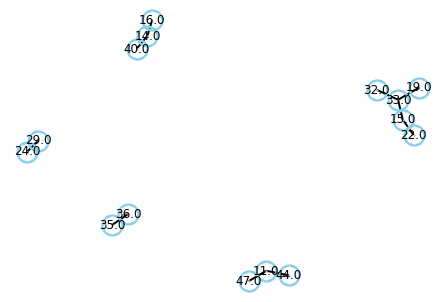

In [38]:
G = nx.from_pandas_edgelist(dataset.tail(10), 'v1', 'v2')
nx.draw(G, node_color="skyblue", linewidths=20, with_labels=True, node_size=5, width=2)

In [39]:
df_corr.columns

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            140, 141, 142, 143, 144, 145, 146, 147, 148, 149],
           dtype='int64', length=150)

In [40]:
i = 0
j = 0
size = len(df_corr)
vec1 = []
vec2 = []

In [41]:
for i in range (size):
    for j in range(size):
        value = df_corr[i].values[j] 
        if ( (value > 0) and (value <1)):
            vec1.append(i)
            vec2.append(j)

In [42]:
df_g = pd.DataFrame({ 'from':vec1, 'to':vec2})

In [54]:
# Build a dataframe with 4 connections
df_g 

,from,to
0,0,1
1,0,2
2,0,3
3,0,4
4,1,0
5,1,2
6,1,3
7,1,4
8,2,0
9,2,1


In [55]:
# Build your graph
G = nx.from_pandas_edgelist(df_g, 'from', 'to')

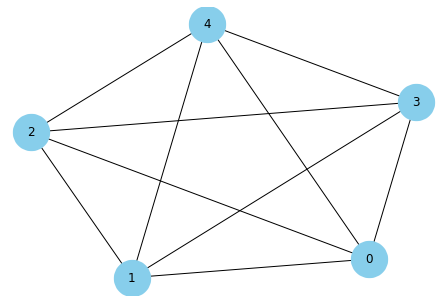

In [56]:
# Plot it
nx.draw(G, node_color="skyblue", linewidths=20, with_labels=True)

In [57]:
plt.show()